In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-05-26 11:24:24.513651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 11:24:25.127316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
learning_rate = 0.01
learning_epoch = 40

In [3]:
x_train = np.linspace(-1, 1, 101)

In [19]:
num_coefs = 6
y_train_coefs = [1,2,3,4,5,6]
y_train = 0

In [20]:
for i in range(num_coefs):
    y_train += y_train_coefs[i] * np.power(x_train, i)

In [21]:
y_train += np.random.randn(*x_train.shape) * 1.5

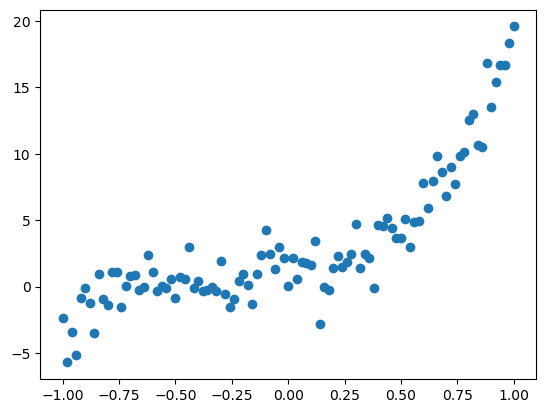

In [22]:
plt.scatter(x_train, y_train)
plt.show()

In [28]:
class PolynominalModel(tf.Module):
    def __init__(self, num_coefs):
        self.w = tf.Variable(tf.zeros([num_coefs]), name='parameters')
        
    def __call__(self, x):
        q = [self.w[i]*np.power(x, i) for i in range(num_coefs)]
        
        return tf.add_n(q)
    
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

def mean_squared_error(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))


In [29]:
model = PolynominalModel(num_coefs)

def train_step(x,y):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = mean_squared_error(y, y_pred)
    gradients = tape.gradient(loss, [model.w])
    optimizer.apply_gradients(zip(gradients, [model.w]))
    return loss

In [30]:
for i in range(learning_epoch):
    for x,y in zip(x_train, y_train):
        loss = train_step(x, y)
    if i % 10 == 0:
        print(f'epoch {i} with loss: {loss}')

epoch 0 with loss: 55.383609771728516
epoch 10 with loss: 0.4728870689868927
epoch 20 with loss: 0.06169674172997475
epoch 30 with loss: 0.011263299733400345


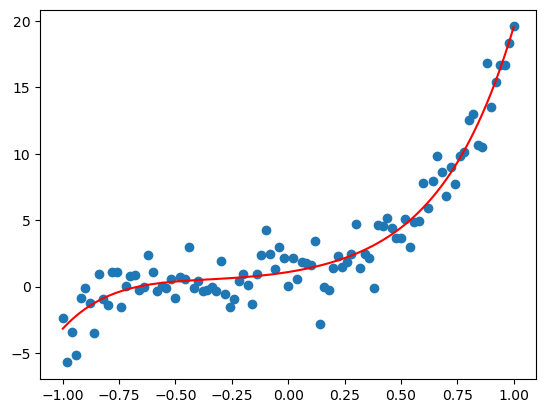

In [32]:
w_val = model.w.numpy()
y_learned = 0
for i in range(num_coefs):
    y_learned += np.power(x_train, i) * w_val[i]
    
plt.scatter(x_train, y_train)
plt.plot(x_train, y_learned, 'r')
plt.show()

In [53]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_train = y_dataset[arr[0:num_train]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [54]:
learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

In [55]:
x_dataset = np.linspace(-1, 1, 100)

num_coefs = 9
y_dataset_params = [0.]*9
y_dataset_params[2] = 1
y_dataset = 0

for i in range(num_coefs):
    y_dataset += y_dataset_params[i]*np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

In [56]:
(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

In [93]:
class PolynominalModel(tf.Module):
    def __init__(self, num_coefs):
        self.w = tf.Variable(tf.zeros([num_coefs], dtype=tf.float32), name='parameters')
        self.num_coefs = num_coefs
        
    def __call__(self, x):
        terms = [np.power(x, i) * self.w[i] for i in range(self.num_coefs)]
        return tf.add_n(terms)

In [94]:
model = PolynominalModel(num_coefs)

In [95]:
# Define the mean squared error loss with regularizationmodel = PolynominalModel(num_coefs)

def compute_loss(y, y_pred,w, reg_lambda, data_size):
    mse_loss = tf.reduce_mean(tf.square(y - y_pred))
    reg_loss = reg_lambda * tf.reduce_mean(tf.square(w))
    loss = (mse_loss + reg_loss) / (2 * data_size)
    return loss

In [96]:
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [101]:
def train_step(model, x, y, reg_lambda):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = compute_loss(y, y_pred, model.w, reg_lambda, x.size)
    gradients = tape.gradient(loss, [model.w])
    optimizer.apply_gradients(zip(gradients, [model.w]))
    return loss

In [103]:
for reg_lambda in np.linspace(0, 1, 100):
    for epoch in range(learning_epoch):
        loss = train_step(model ,x_train, y_train, reg_lambda)
    final_cost = compute_loss(y_test, model(x_test), model.w ,reg_lambda, x_test.size)
    print(f"reg lambda: {reg_lambda}, final cost: {final_cost.numpy()}")
    
print(f"Trained parameters: {model.w.numpy()}")


reg lambda: 0.0, final cost: 0.004343966953456402
reg lambda: 0.010101010101010102, final cost: 0.00434031430631876
reg lambda: 0.020202020202020204, final cost: 0.004336667247116566
reg lambda: 0.030303030303030304, final cost: 0.004333024844527245
reg lambda: 0.04040404040404041, final cost: 0.004329388029873371
reg lambda: 0.05050505050505051, final cost: 0.004325756337493658
reg lambda: 0.06060606060606061, final cost: 0.004322129767388105
reg lambda: 0.07070707070707072, final cost: 0.0043185073882341385
reg lambda: 0.08080808080808081, final cost: 0.004314891993999481
reg lambda: 0.09090909090909091, final cost: 0.004311281256377697
reg lambda: 0.10101010101010102, final cost: 0.004307675641030073
reg lambda: 0.11111111111111112, final cost: 0.00430407514795661
reg lambda: 0.12121212121212122, final cost: 0.004300479777157307
reg lambda: 0.13131313131313133, final cost: 0.004296889994293451
reg lambda: 0.14141414141414144, final cost: 0.004293304868042469
reg lambda: 0.1515151515